In [1]:
from cobaya.yaml import yaml_load_file
import arviz as az

# Export the results to GetDist
from getdist.mcsamples import loadMCSamples

# Notice loadMCSamples requires a *full path*
import os
from matplotlib import pyplot as plt
import matplotlib

matplotlib.rcParams.update(
    {
        "font.size": 16,
        "axes.labelsize": 24,
        "axes.titlesize": 18,
        "text.usetex": True,
        "xtick.major.width": 1.5,
        "xtick.minor.width": 1.2,
        "ytick.major.width": 1.5,
        "ytick.minor.width": 1.2,
        "legend.fontsize": 18,
    }
)

In [13]:
import camb
from camb import model
import numpy as np

vscale = 0.691
ombh2 = 0.0224  # total baryon matter density. this is fixed
omh2 = 0.1425  # total matter density
omch2 = omh2 - ombh2  # this is total cdm density, total - baryon

n_p = 0.99  # this is spectral index at 0.78 h/mpc
A_p = 1.56 * 10**-9  # this is amplitude at 0.79 h/mpc
# KODIAQ
A_p = 2.3 * 10**-9  # this is amplitude at 0.79 h/mpc

pars = camb.CAMBparams()
pars.set_cosmology(H0=vscale * 100, ombh2=ombh2, omch2=omch2)
pars.InitPower.set_params(ns=n_p, As=A_p, pivot_scalar=0.78, pivot_tensor=0.78)
# Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.0], kmax=30.0)

pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)

s8 = np.array(results.get_sigma8())

s8

array([0.87442135])

In [3]:
vscale = 0.684
ombh2 = 0.0224  # total baryon matter density. this is fixed
omh2 = 0.1427  # total matter density
omch2 = omh2 - ombh2  # this is total cdm density, total - baryon

n_p = 0.972  # this is spectral index at 0.78 h/mpc
A_p = 1.38 * 10**-9  # this is amplitude at 0.79 h/mpc

pars = camb.CAMBparams()
pars.set_cosmology(H0=vscale * 100, ombh2=ombh2, omch2=omch2)
pars.InitPower.set_params(ns=n_p, As=A_p, pivot_scalar=0.78, pivot_tensor=0.78)


pars.set_matter_power(redshifts=[0.0], kmax=30.0)

pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)

s8 = np.array(results.get_sigma8())

s8

array([0.68857067])

Probably ok


In [4]:
def compute_sigma8(
    vscale: float,
    omh2: float,  # total matter density
    n_p: float,  # this is spectral index at 0.78 h/mpc
    A_p: float,  # this is amplitude at 0.79 h/mpc
    ombh2: float = 0.0224,  # total baryon matter density. this is fixed
):
    omch2 = omh2 - ombh2  # this is total cdm density, total - baryon
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=vscale * 100, ombh2=ombh2, omch2=omch2)
    pars.InitPower.set_params(ns=n_p, As=A_p, pivot_scalar=0.78, pivot_tensor=0.78)

    pars.set_matter_power(redshifts=[0.0], kmax=30.0)

    pars.NonLinear = model.NonLinear_none
    results = camb.get_results(pars)

    s8 = np.array(results.get_sigma8())

    return s8

In [5]:
compute_sigma8(
    vscale=0.684,
    ombh2=0.0224,  # total baryon matter density. this is fixed
    omh2=0.1427,  # total matter density
    n_p=0.972,  # this is spectral index at 0.78 h/mpc
    A_p=1.38 * 10**-9,  # this is amplitude at 0.79 h/mpc
)

array([0.68857067])

# Read files


In [6]:
# 2.6 - 4.6
info_from_yaml = yaml_load_file("../Chains/fps-meant/mf-48-48-z2.6-4.6.input.yaml")
# 2.2 - 4.6
info_from_yaml_2_2 = yaml_load_file("../Chains/fps-meant/mf-48-48-z2.2-4.6.input.yaml")

# FPS only
info_from_yaml_fps_only = yaml_load_file("../Chains/fps-only/mf-48-z2.6-4.6.input.yaml")

info_from_yaml

{'likelihood': {'lyaemu.likelihood.CobayaLikelihoodClass': {'basedir': '../dtau-48-48',
   'HRbasedir': '../dtau-48-48/hires',
   'mean_flux': 's',
   'max_z': 4.6,
   'min_z': 2.6,
   'emulator_class': 'standard',
   't0_training_value': 1.0,
   'optimise_GP': True,
   'emulator_json_file': 'emulator_params.json',
   'data_corr': True,
   'traindir': '../dtau-48-48/trained_mf',
   'loo_errors': True,
   'hprior': True,
   'oprior': False,
   'bhprior': True,
   'tau_thresh': 1000000.0,
   'sim_meant': None,
   'use_meant': True,
   'meant_fac': 8.07,
   'include_emu': False,
   'data_power': None}},
 'params': {'dtau0': {'prior': {'min': -0.4, 'max': 0.25},
   'proposal': 0.006500000000000001,
   'latex': 'd\\tau_0'},
  'tau0': {'prior': {'min': 0.75, 'max': 1.25},
   'proposal': 0.005,
   'latex': '\\tau_0'},
  'ns': {'prior': {'min': 0.8, 'max': 0.995},
   'proposal': 0.0019499999999999995,
   'latex': 'n_\\mathrm{P}'},
  'Ap': {'prior': {'min': 1.2e-09, 'max': 2.6e-09},
   'proposa

In [7]:
# 2.6 - 4.6
gd_sample = loadMCSamples(
    os.path.join("../Chains/fps-meant/", info_from_yaml["output"])
)
# 2.2 - 4.6
gd_sample_2_2 = loadMCSamples(
    os.path.join("../Chains/fps-meant/", info_from_yaml_2_2["output"])
)

# FPS only
gd_sample_fps = loadMCSamples(
    os.path.join("../Chains/fps-only/", info_from_yaml_fps_only["output"])
)

In [8]:
info_from_yaml["params"].keys()

dict_keys(['dtau0', 'tau0', 'ns', 'Ap', 'herei', 'heref', 'alphaq', 'hub', 'omegamh2', 'hireionz', 'bhfeedback', 'a_lls', 'a_dla', 'fSiIII'])

In [9]:
mean = gd_sample.getMeans()
mean_fps = gd_sample_fps.getMeans()

In [10]:
# ns, Ap, vscale, omh2 = mean[[2, 3, 7, 8]]
ns, Ap, vscale, omh2 = mean_fps[[2, 3, 7, 8]]

### Get the samples


In [11]:
ns_samples = gd_sample_fps["ns"]
Ap_samples = gd_sample_fps["Ap"]
omh2_samples = gd_sample_fps["omegamh2"]
vscale_samples = gd_sample_fps["hub"]

In [12]:
# n_samples = ns_samples.shape[0]

# sigma_8_samples = []

# for i in range(n_samples):
#     sigma_8 = compute_sigma8(
#         vscale=vscale,
#         omh2=omh2,
#         n_p=ns,
#         A_p=Ap,
#     )

#     if i % 10000 == 0:
#         print("[Info]", i)
#     sigma_8_samples.append(sigma_8)

In [13]:
sigma8_samples = np.loadtxt("../Chains/fps-only/sigma_8_mf-48-z2.6-4.6.txt")
gd_sample_fps.addDerived(paramVec=sigma8_samples, name=r"\sigma_8")

sigma8_samples

array([0.7162622 , 0.71667231, 0.71545701, ..., 0.72239856, 0.72259971,
       0.7207953 ])

In [14]:
argmaxidx = gd_sample_fps.loglikes.argmax()
print("Maximum likelihood", gd_sample_fps["\sigma_8"][argmaxidx])
print("Highest density interval", az.hdi(gd_sample_fps["\sigma_8"], hdi_prob=(0.68)))

names = gd_sample_fps.getParamNames()

corr_mat_fps = gd_sample_fps.getCorrelationMatrix()

Maximum likelihood 0.7283775196086025
Highest density interval [0.70336201 0.75512003]


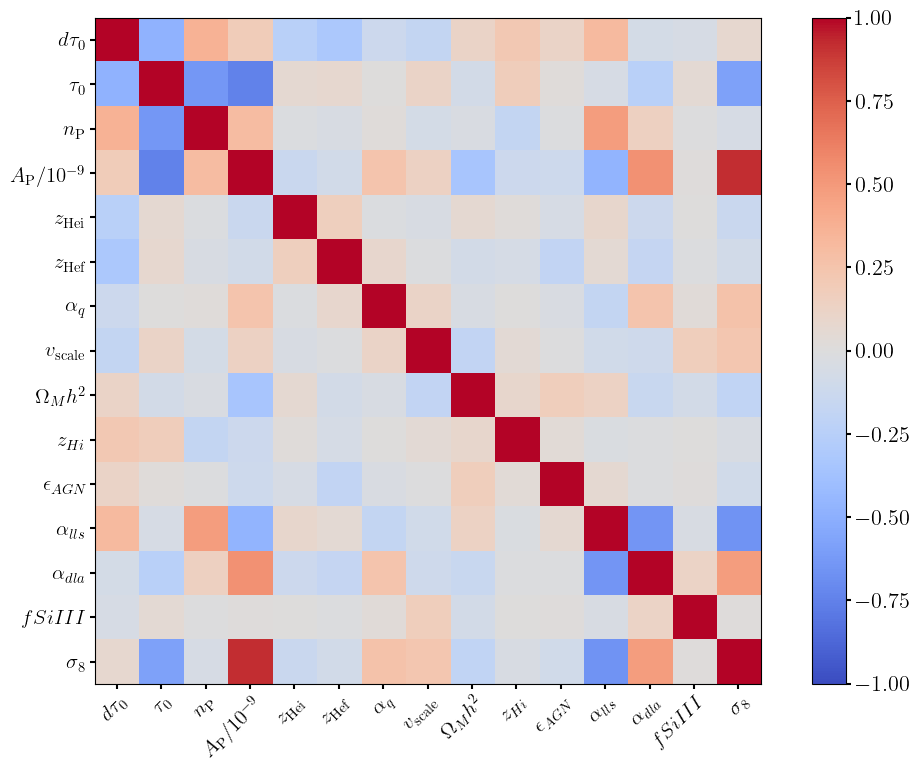

In [15]:
plt.figure(figsize=(11, 8))

# labels = [r'$n_\mathrm{P}$', r'$A_\mathrm{P}/10^{-9}$', r'$z^{HeII}_i$', r'$z^{HeII}_f$', r'$\alpha_{q}$', r'$v_\mathrm{scale}$', r'$\Omega_M h^2$', r'$z^{HI}$', r'$\tau_0$', r'$d\tau_0$', r'$\alpha_{lls}$', r'$\alpha_{DLA}$', r'fSiIII']
labels = [
    r"$d\tau_0$",
    r"$\tau_0$",
    r"$n_\mathrm{P}$",
    r"$A_\mathrm{P}/10^{-9}$",
    r"$z_\mathrm{He i}$",
    r"$z_\mathrm{He f}$",
    r"$\alpha_q$",
    r"$v_\mathrm{scale}$",
    r"$\Omega_M h^2$",
    r"$z_{Hi}$",
    r"$\epsilon_{AGN}$",
    r"$\alpha_{lls}$",
    r"$\alpha_{dla}$",
    r"$fSiIII$",
    r"$\chi^2$",
    r"$\chi^2_\mathrm{lyaemu}$",
    r"$\sigma_8$",
]

# select a subset of columns
index = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16])
new_labels = np.array(labels)[index]

plt.imshow(corr_mat_fps[np.ix_(index, index)], vmin=-1, vmax=1, cmap="coolwarm")
plt.colorbar()

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(new_labels)), labels=new_labels, size=15)
plt.yticks(np.arange(len(new_labels)), labels=new_labels, size=15)
# Rotate the tick labels and set their alignment.
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.tight_layout()
# plt.savefig("correlation_z26_46_t0.pdf")
plt.show()

In [16]:
# alpha_q lower, more heating. More heating, then less neutral gas, then less sigma_8.
# More alpha_DLA, more DLA in eBOSS, the template will decrease large scale and enhance small scales, thus enhance sigma_8.
# More alpha_LLS, more LLS in eBOSS, the temaplte will decrease the power at all scales, thus decrease sigma_8.
# More tau_0, more mean flux suppression, Pk power is higher, degenerate with sigma_8

## Mean-T Correlation Matrix


In [17]:
sigma8_samples = np.loadtxt("../Chains/fps-meant/sigma_8_mf-48-48-z2.6-4.6.txt")
gd_sample.addDerived(paramVec=sigma8_samples, name=r"\sigma_8")

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

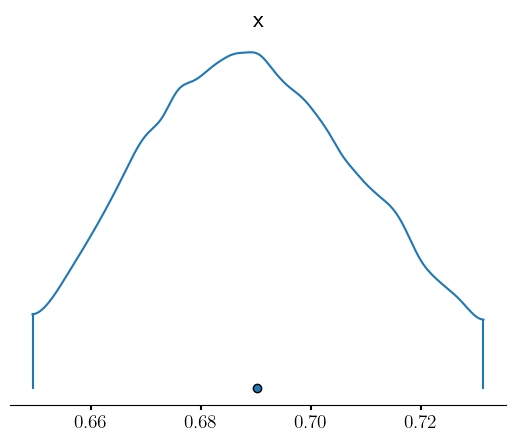

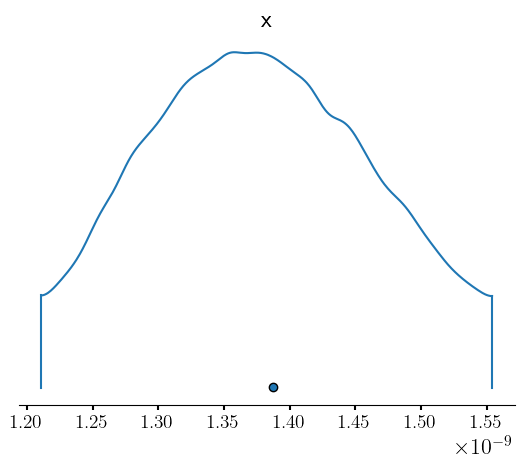

In [18]:
az.plot_density(gd_sample["\sigma_8"])
az.plot_density(gd_sample["Ap"])

In [19]:
argmaxidx = gd_sample.loglikes.argmax()

print("Maximum likelihood", gd_sample["\sigma_8"][argmaxidx])
print("Maximum likelihood", gd_sample["Ap"][argmaxidx])
print("Mean", gd_sample.getMeans()[-1])
print("Highest density interval", az.hdi(gd_sample["\sigma_8"], hdi_prob=(0.68)))

names = gd_sample.getParamNames()

corr_mat = gd_sample.getCorrelationMatrix()

Maximum likelihood 0.7343845902707561
Maximum likelihood 1.4700764e-09
Mean 0.6891198960668463
Highest density interval [0.66508826 0.70968979]


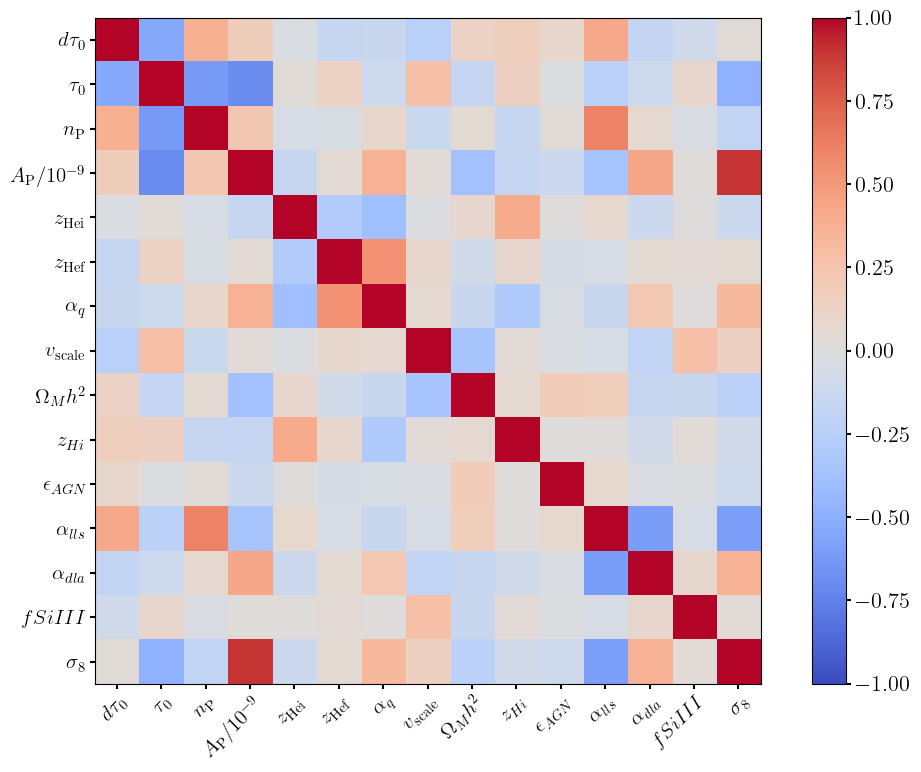

In [20]:
plt.figure(figsize=(11, 8))

# labels = [r'$n_\mathrm{P}$', r'$A_\mathrm{P}/10^{-9}$', r'$z^{HeII}_i$', r'$z^{HeII}_f$', r'$\alpha_{q}$', r'$v_\mathrm{scale}$', r'$\Omega_M h^2$', r'$z^{HI}$', r'$\tau_0$', r'$d\tau_0$', r'$\alpha_{lls}$', r'$\alpha_{DLA}$', r'fSiIII']
labels = [
    r"$d\tau_0$",
    r"$\tau_0$",
    r"$n_\mathrm{P}$",
    r"$A_\mathrm{P}/10^{-9}$",
    r"$z_\mathrm{He i}$",
    r"$z_\mathrm{He f}$",
    r"$\alpha_q$",
    r"$v_\mathrm{scale}$",
    r"$\Omega_M h^2$",
    r"$z_{Hi}$",
    r"$\epsilon_{AGN}$",
    r"$\alpha_{lls}$",
    r"$\alpha_{dla}$",
    r"$fSiIII$",
    r"$\chi^2$",
    r"$\chi^2_\mathrm{lyaemu}$",
    r"$\sigma_8$",
]

# select a subset of columns
index = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16])
new_labels = np.array(labels)[index]

plt.imshow(corr_mat[np.ix_(index, index)], vmin=-1, vmax=1, cmap="coolwarm")
plt.colorbar()

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(new_labels)), labels=new_labels, size=15)
plt.yticks(np.arange(len(new_labels)), labels=new_labels, size=15)
# Rotate the tick labels and set their alignment.
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.tight_layout()
# plt.savefig("correlation_z26_46_t0.pdf")
plt.show()

## For Slides purpose


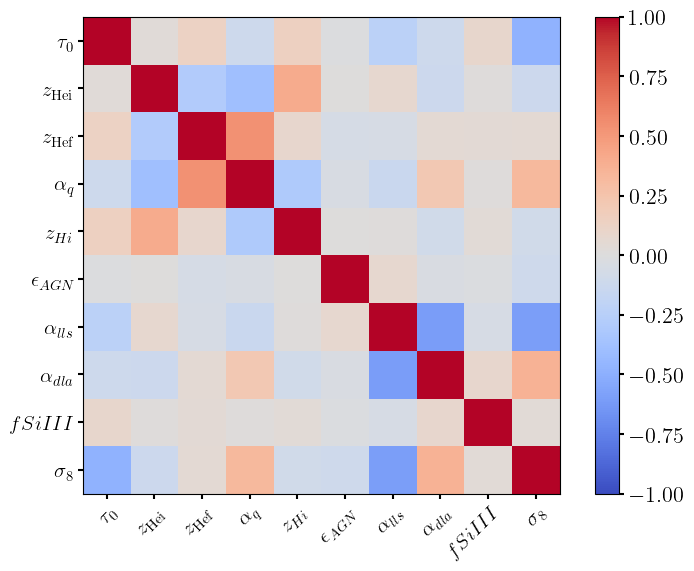

In [24]:
plt.figure(figsize=(8, 6))

# labels = [r'$n_\mathrm{P}$', r'$A_\mathrm{P}/10^{-9}$', r'$z^{HeII}_i$', r'$z^{HeII}_f$', r'$\alpha_{q}$', r'$v_\mathrm{scale}$', r'$\Omega_M h^2$', r'$z^{HI}$', r'$\tau_0$', r'$d\tau_0$', r'$\alpha_{lls}$', r'$\alpha_{DLA}$', r'fSiIII']
labels = [
    r"$d\tau_0$",
    r"$\tau_0$",
    r"$n_\mathrm{P}$",
    r"$A_\mathrm{P}/10^{-9}$",
    r"$z_\mathrm{He i}$",
    r"$z_\mathrm{He f}$",
    r"$\alpha_q$",
    r"$v_\mathrm{scale}$",
    r"$\Omega_M h^2$",
    r"$z_{Hi}$",
    r"$\epsilon_{AGN}$",
    r"$\alpha_{lls}$",
    r"$\alpha_{dla}$",
    r"$fSiIII$",
    r"$\chi^2$",
    r"$\chi^2_\mathrm{lyaemu}$",
    r"$\sigma_8$",
]

# select a subset of columns
index = np.array([1, 4, 5, 6, 9, 10, 11, 12, 13, 16])
new_labels = np.array(labels)[index]

plt.imshow(corr_mat[np.ix_(index, index)], vmin=-1, vmax=1, cmap="coolwarm")
plt.colorbar()

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(new_labels)), labels=new_labels, size=15)
plt.yticks(np.arange(len(new_labels)), labels=new_labels, size=15)
# Rotate the tick labels and set their alignment.
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.tight_layout()
# plt.savefig("correlation_z26_46_t0.pdf")
plt.show()

## Difference between corr_mats


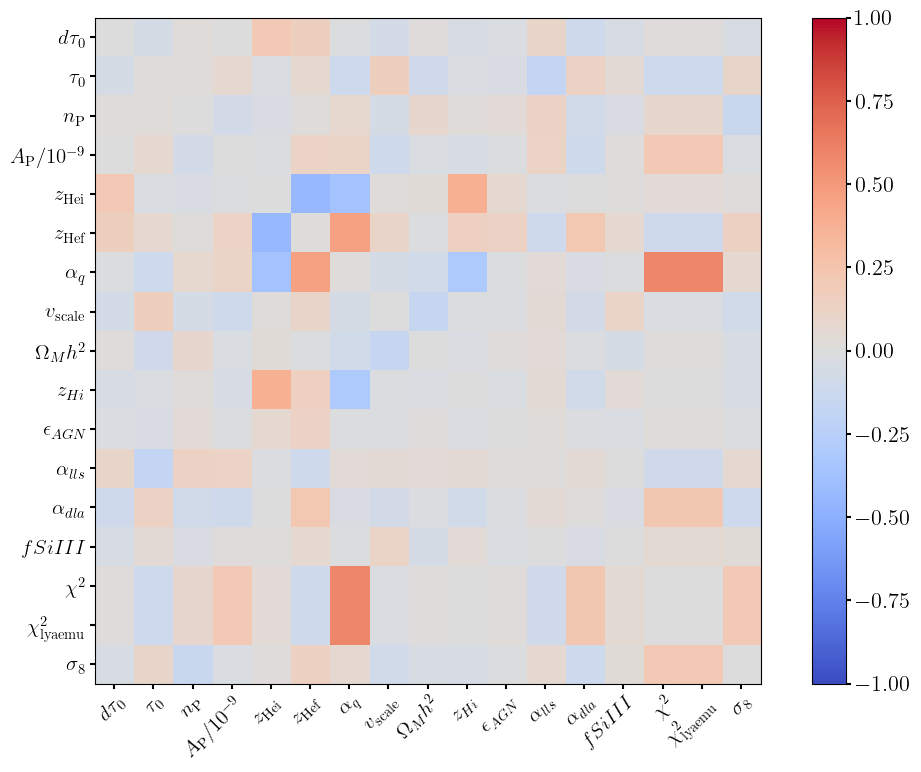

In [105]:
plt.figure(figsize=(11, 8))
plt.imshow(corr_mat - corr_mat_fps, vmin=-1, vmax=1, cmap="coolwarm")
plt.colorbar()
# labels = [r'$n_\mathrm{P}$', r'$A_\mathrm{P}/10^{-9}$', r'$z^{HeII}_i$', r'$z^{HeII}_f$', r'$\alpha_{q}$', r'$v_\mathrm{scale}$', r'$\Omega_M h^2$', r'$z^{HI}$', r'$\tau_0$', r'$d\tau_0$', r'$\alpha_{lls}$', r'$\alpha_{DLA}$', r'fSiIII']
labels = [
    r"$d\tau_0$",
    r"$\tau_0$",
    r"$n_\mathrm{P}$",
    r"$A_\mathrm{P}/10^{-9}$",
    r"$z_\mathrm{He i}$",
    r"$z_\mathrm{He f}$",
    r"$\alpha_q$",
    r"$v_\mathrm{scale}$",
    r"$\Omega_M h^2$",
    r"$z_{Hi}$",
    r"$\epsilon_{AGN}$",
    r"$\alpha_{lls}$",
    r"$\alpha_{dla}$",
    r"$fSiIII$",
    r"$\chi^2$",
    r"$\chi^2_\mathrm{lyaemu}$",
    r"$\sigma_8$",
]

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(labels)), labels=labels, size=15)
plt.yticks(np.arange(len(labels)), labels=labels, size=15)
# Rotate the tick labels and set their alignment.
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.tight_layout()
# plt.savefig("correlation_z26_46_t0.pdf")
plt.show()

In [ ]:
def plot_correlation(correl_file="correlation-z26-46-t0.txt"):
    """Plot a heat map of the correlation matrix"""
    correl = np.loadtxt(correl_file)
    plt.imshow(correl, vmin=-1, vmax=1)
    plt.colorbar()
    labels = [
        r"$n_\mathrm{P}$",
        r"$A_\mathrm{P}/10^{-9}$",
        r"$z^{HeII}_i$",
        r"$z^{HeII}_f$",
        r"$\alpha_{q}$",
        r"$v_\mathrm{scale}$",
        r"$\Omega_M h^2$",
        r"$z^{HI}$",
        r"$\tau_0$",
        r"$d\tau_0$",
        r"$\alpha_{lls}$",
        r"$\alpha_{DLA}$",
        r"fSiIII",
    ]
    # Show all ticks and label them with the respective list entries
    plt.xticks(np.arange(len(labels)), labels=labels, size=15)
    plt.yticks(np.arange(len(labels)), labels=labels, size=15)
    # Rotate the tick labels and set their alignment.
    plt.setp(
        plt.gca().get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor"
    )
    plt.tight_layout()
    plt.savefig("correlation_z26_46_t0.pdf")
    plt.show()

In [26]:
az.hdi(sigma8_samples)

array([0.68165842, 0.78067324])